In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("weather-check.csv")

In [3]:
df[df.select_dtypes(['object']).columns] =\
    df.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [4]:
df = df.replace("-", np.NaN)

In [5]:
df.columns = ["ID", "Report_Check", "Check_Type", "App_Website",
              "Smart_Watch_Use", "Age", "Gender", "Income", "Region"]

In [6]:
df.head()

,ID,Report_Check,Check_Type,App_Website,Smart_Watch_Use,Age,Gender,Income,Region
0,3887201482,Yes,The default weather app on your phone,NaN,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic
1,3887159451,Yes,The default weather app on your phone,NaN,Very likely,18 - 29,Male,Prefer not to answer,NaN
2,3887152228,Yes,The default weather app on your phone,NaN,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic
3,3887145426,Yes,The default weather app on your phone,NaN,Somewhat likely,30 - 44,Male,Prefer not to answer,NaN
4,3887021873,Yes,A specific website or app (please provide the ...,Iphone app,Very likely,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic


In [7]:
df.dropna(inplace = True)

In [8]:
df = df.reset_index(drop = True)

In [9]:
df_vis = df[["Smart_Watch_Use", "Age"]].copy()

In [10]:
abs_df = pd.crosstab(df['Age'], df_vis['Smart_Watch_Use'])
last_df = pd.DataFrame()
for i in range(len(abs_df)):
    row = abs_df.iloc[i]
    last_df = last_df.append(row)
last_df

,Somewhat likely,Somewhat unlikely,Very likely,Very unlikely
18 - 29,11.0,0.0,14.0,3.0
30 - 44,18.0,1.0,16.0,9.0
45 - 59,12.0,3.0,30.0,11.0
60+,10.0,4.0,21.0,10.0


In [11]:
perc_df = pd.crosstab(df['Age'], df_vis['Smart_Watch_Use']).apply(lambda x: round(x/x.sum() * 100, 2), axis=1)
last_df_perc = pd.DataFrame()
for i in range(len(perc_df)):
    row = perc_df.iloc[i]
    last_df_perc = last_df_perc.append(row)
last_df_perc

,Somewhat likely,Somewhat unlikely,Very likely,Very unlikely
18 - 29,39.29,0.00,50.00,10.71
30 - 44,40.91,2.27,36.36,20.45
45 - 59,21.43,5.36,53.57,19.64
60+,22.22,8.89,46.67,22.22


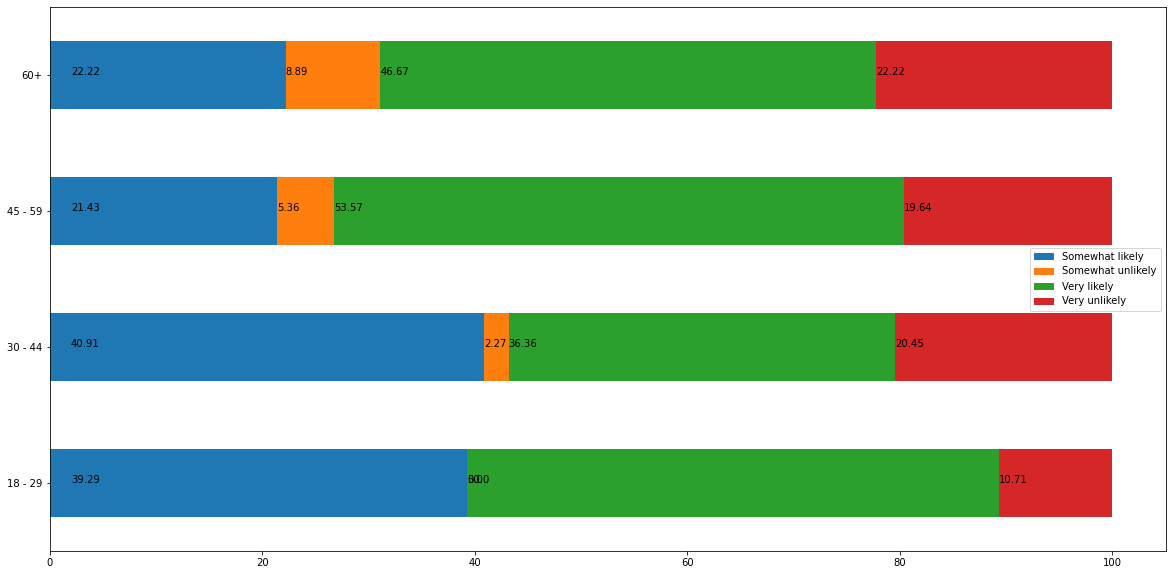

In [12]:
last_df_perc.plot(kind = 'barh', stacked = True, figsize=(20, 10))

pos_values = []
for i in range(last_df_perc.shape[0]):
    a = np.cumsum(last_df_perc.iloc[i]).values
    pos_values.append(a)

plt.text(2, 0, last_df_perc.iloc[0][0])
plt.text(2, 1, last_df_perc.iloc[1][0])
plt.text(2, 2, last_df_perc.iloc[2][0])
plt.text(2, 3, last_df_perc.iloc[3][0])

for i in range(last_df_perc.shape[1]):
    for j in range(1, last_df_perc.shape[0]):
        plt.text(pos_values[i][j-1], i, last_df_perc.iloc[i][j]);

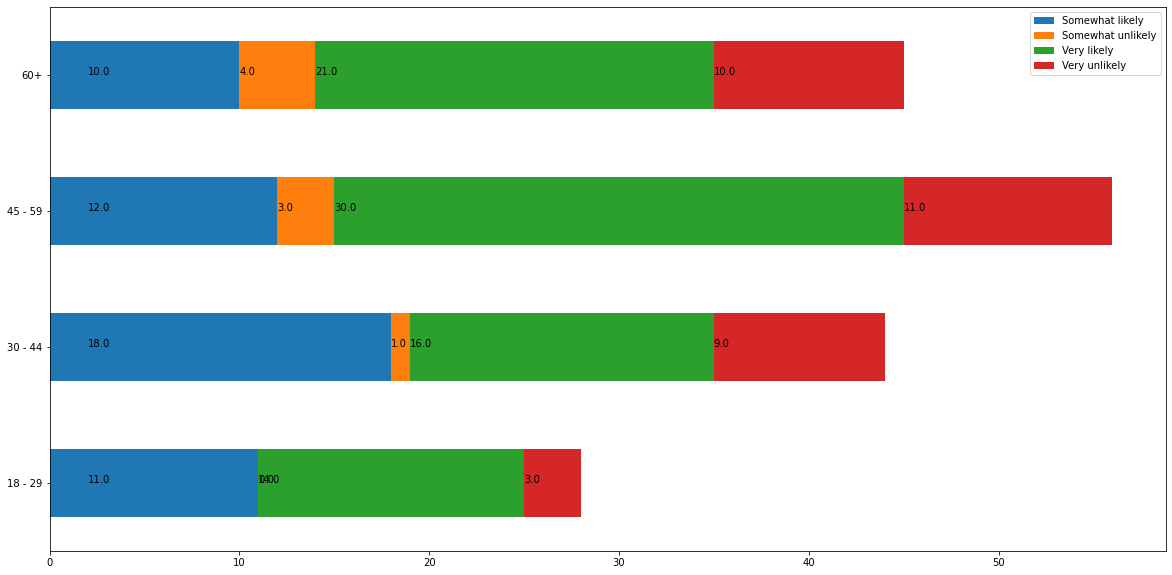

In [13]:
last_df.plot(kind = 'barh', stacked = True, figsize=(20, 10))

pos_values = []
for i in range(last_df.shape[0]):
    a = np.cumsum(last_df.iloc[i]).values
    pos_values.append(a)

plt.text(2, 0, last_df.iloc[0][0])
plt.text(2, 1, last_df.iloc[1][0])
plt.text(2, 2, last_df.iloc[2][0])
plt.text(2, 3, last_df.iloc[3][0])

for i in range(last_df_perc.shape[1]):
    for j in range(1, last_df_perc.shape[0]):
        plt.text(pos_values[i][j-1], i, last_df.iloc[i][j]);

In [14]:
def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax

In [15]:
dict_abs = last_df.T.to_dict('list')
dict_perc = last_df_perc.T.to_dict('list')
categories = list(last_df.columns.values)

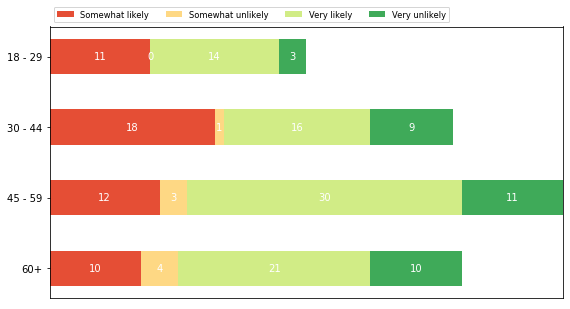

In [16]:
survey(dict_abs, categories);

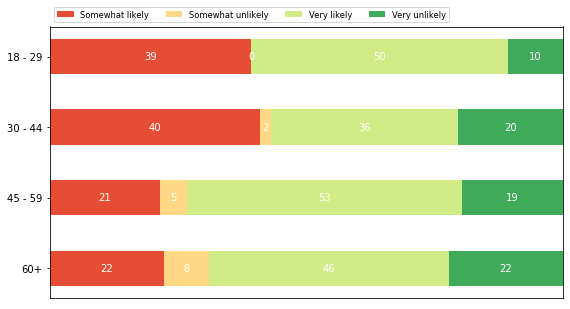

In [17]:
survey(dict_perc, categories);

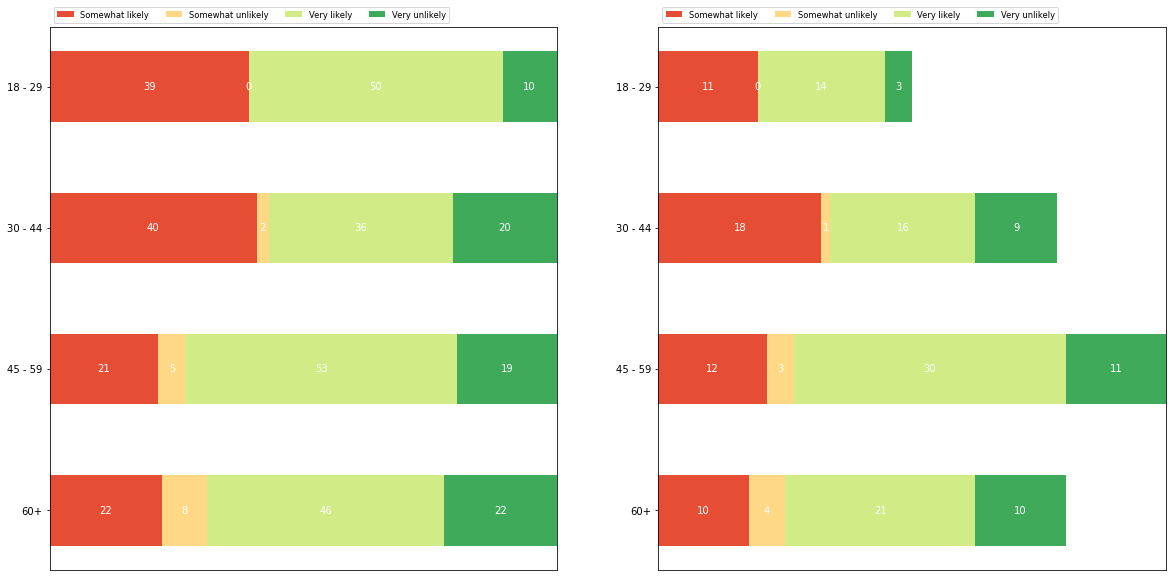

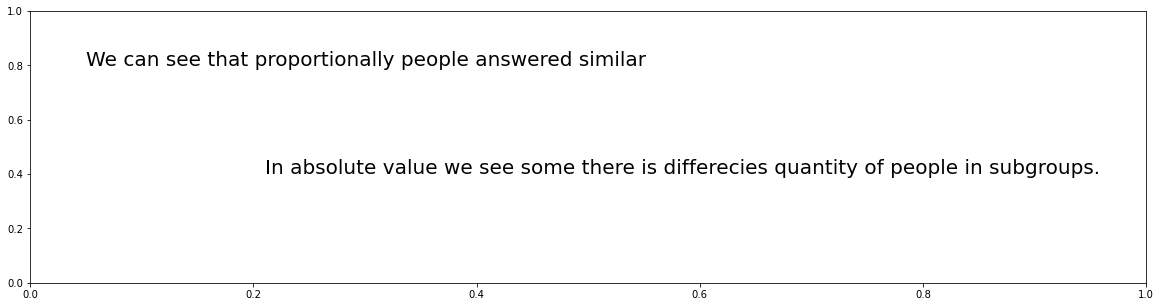

In [18]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(20, 10))
fig2, ax2 = plt.subplots(1, 1, figsize=(20, 5))

# first plot
labels = list(dict_perc.keys())
data = np.array(list(dict_perc.values()))
data_cum = data.cumsum(axis=1)
category_colors = plt.get_cmap('RdYlGn')(
    np.linspace(0.15, 0.85, data.shape[1]))
ax[0].invert_yaxis()
ax[0].xaxis.set_visible(False)
ax[0].set_xlim(0, np.sum(data, axis=1).max())

for i, (colname, color) in enumerate(zip(categories, category_colors)):
    widths = data[:, i]
    starts = data_cum[:, i] - widths
    ax[0].barh(labels, widths, left=starts, height=0.5,
            label=colname, color=color)
    xcenters = starts + widths / 2
    r, g, b, _ = color
    text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    for y, (x, c) in enumerate(zip(xcenters, widths)):
        ax[0].text(x, y, str(int(c)), ha='center', va='center',
                color=text_color)
    ax[0].legend(ncol=len(categories), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')
    
# second plot

labels = list(dict_abs.keys())
data = np.array(list(dict_abs.values()))
data_cum = data.cumsum(axis=1)
category_colors = plt.get_cmap('RdYlGn')(
    np.linspace(0.15, 0.85, data.shape[1]))
ax[1].invert_yaxis()
ax[1].xaxis.set_visible(False)
ax[1].set_xlim(0, np.sum(data, axis=1).max())

for i, (colname, color) in enumerate(zip(categories, category_colors)):
    widths = data[:, i]
    starts = data_cum[:, i] - widths
    ax[1].barh(labels, widths, left=starts, height=0.5,
            label=colname, color=color)
    xcenters = starts + widths / 2
    r, g, b, _ = color
    text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    for y, (x, c) in enumerate(zip(xcenters, widths)):
        ax[1].text(x, y, str(int(c)), ha='center', va='center',
                color=text_color)
    ax[1].legend(ncol=len(categories), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')
    
# plot 3
ax2.text(0.05, 0.8,'We can see that proportionally people answered similar', fontsize = 20);
ax2.text(0.21,0.4,'In absolute value we see some there is differecies quantity of people in subgroups.', fontsize = 20);